<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Notes/TensorFlow_Addons_Image_Operations_and_Color_Space_Conversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image operations in TensorFlow Addons.

* `tfa.image.mean_filter2d`
* `tfa.image.rotate`
* `tfa.image.transform`
* `tfa.image.random_hsv_in_yiq`
* `tfa.image.adjust_hsv_in_yiq`
* `tfa.image.dense_image_warp`
* `tfa.image.euclidean_dist_transform`

In [2]:
pip install tensorflow-addons

     |████████████████████████████████| 686kB 6.8MB/s 


In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

Download the image

In [4]:
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

40960/39781 [==============================] - 0s 1us/step


In [5]:
def process_img(img_path):
  raw = tf.io.read_file(img_path)
  img = tf.image.decode_image(raw)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [500,500])

In [6]:
img = process_img(img_path)

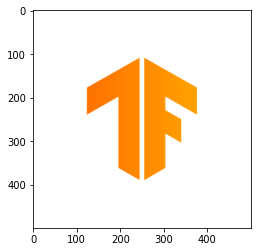

In [9]:
# display the image
plt.imshow(img);

## Make a black and white version

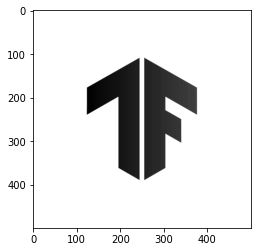

In [12]:
bw_img = tf.image.rgb_to_grayscale(img)

plt.imshow(tf.squeeze(bw_img), cmap=plt.cm.gray);

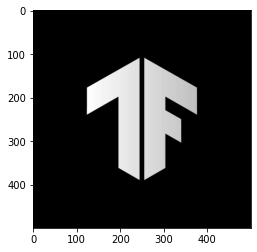

In [14]:
bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.imshow(tf.squeeze(bw_img), cmap=plt.cm.gray);

## Mean filtering
Mean filtering is a filtering technique, which is often used to **remove noise** from an image or signal. The idea is to run through the image pixel by pixel and replacing it with the average values of neighboring pixels.

Shape of image (500, 500, 3)
Filter shape  10


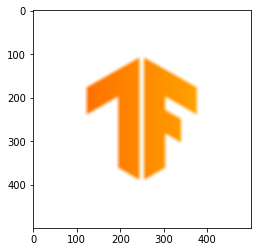

In [21]:
mean = tfa.image.mean_filter2d(img, filter_shape=10)
print('Shape of image',img.shape)
print('Filter shape ',10)
plt.imshow(mean);

## Rotate
This operation rotates the given image by the angle (in radians) input by the user.

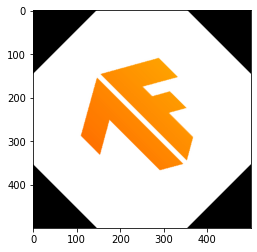

In [24]:
rotate = tfa.image.rotate(img, tf.constant(np.pi/4))

plt.imshow(rotate);

## Transform
This operation transforms the given image on the basis of the transform vector given by the user.

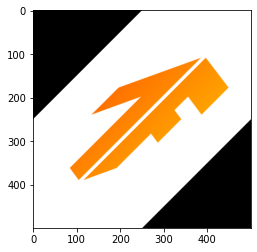

In [25]:
transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])

plt.imshow(transform);

## Random HSV in YIQ
This operation changes color scale of a given RGB image to YIQ but here delta hue and saturation values are picked randomly from the given range.

YIQ is the color space used by the NTSC color TV system, employed mainly in North and Central America, and Japan. I stands for in-phase, while Q stands for quadrature, referring to the components used in quadrature amplitude modulation. 

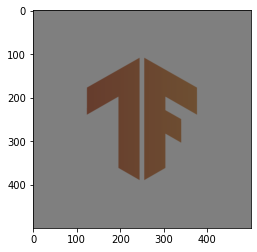

In [26]:
hsv_in_yiq = tfa.image.random_hsv_in_yiq(img, max_delta_hue=0.2, lower_saturation=0.5, upper_saturation=0.5, lower_value=0.5, upper_value=0.5, seed=42)

plt.imshow(hsv_in_yiq);

## Adjust HSV in YIQ
This operation changes color scale of a given RGB image to YIQ but here instead of choosing randomly, delta hue and saturation values are inputs form the user.

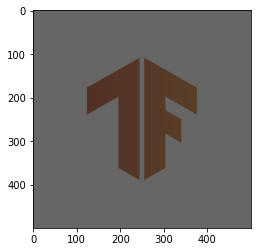

In [28]:
adj_hsv_in_yiq = tfa.image.adjust_hsv_in_yiq(img, delta_hue=0.2, scale_saturation=0.5, scale_value=0.4)

plt.imshow(adj_hsv_in_yiq);

## Dense Image Warp
This operation is for non-linear warp of any image specified by the flow field of the offset vector (here used random values for example)

Apply a non-linear warp to the image, where the warp is specified by a dense flow field of offset vectors that define the correspondences of pixel values in the output image back to locations in the source image.

input image :	4-D float Tensor with shape [batch, height, width, channels].

flow :	A 4-D float Tensor with shape [batch, height, width, 2].

In [29]:
input_img = tf.expand_dims(img,0)
print('Shape of input image', input_img.shape)

Shape of input image (1, 500, 500, 3)


In [30]:
flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]

print('Flow shape',flow_shape)

Flow shape [1, 500, 500, 2]


In [32]:
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)

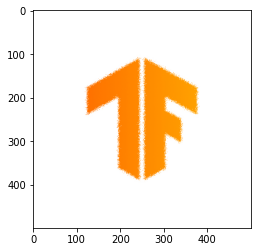

In [34]:
dense_img_wrap = tfa.image.dense_image_warp(input_img, init_flows)

plt.imshow(tf.squeeze(dense_img_wrap));

## Euclidian Distance Transform
This operation updates the pixel value with the euclidian distance from the foreground pixel to the background one.

Note : It takes only binary image and results in transformed image. If a different image is given it results in a image with single value

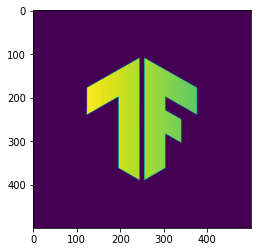

In [39]:
gray = tf.image.convert_image_dtype(bw_img, 'uint8')

plt.imshow(tf.squeeze(gray));

In [42]:
# The op expects a batch of images, so add a batch dimension
print('Shape of image', gray.shape)
gray = tf.expand_dims(gray, 0)
print('Shape of image', gray.shape)

Shape of image (500, 500, 1)
Shape of image (1, 500, 500, 1)


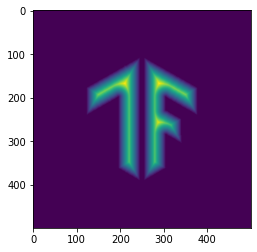

In [44]:
eucid = tfa.image.euclidean_dist_transform(gray)

plt.imshow(tf.squeeze(eucid));

In [47]:
print('shape of eucid', eucid.shape)
print('shape of squeezed eucid', tf.squeeze(eucid).shape)

shape of eucid (1, 500, 500, 1)
shape of squeezed eucid (500, 500)


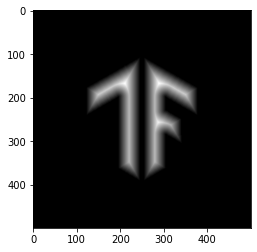

In [49]:
# cmap = gray
plt.imshow(tf.squeeze(eucid), cmap=plt.cm.gray);

# Color Space Conversions

In computer vision, the selected color space could have a significance the performance of the model. While RGB is the most common color space, in manay situations the model performs better when switching to alternative color spaces such as 
* **YUV**
*  **YCbCr**
*  **XYZ (CIE)** <br>
, etc.

The tensorflow-io package provides a list of color space conversions APIs that can be used to prepare and augment the image data.

In [50]:
pip install tensorflow-io

     |████████████████████████████████| 22.7MB 124kB/s 
     |████████████████████████████████| 2.3MB 31.8MB/s 


## Download the sample image

In [51]:
cat = tf.keras.utils.get_file('cat_on_snow','https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')

24576/17858 [=========================================] - 0s 0us/step


In [52]:
cat_raw = tf.io.read_file(cat)
cat_img = tf.image.decode_image(cat_raw)

print('Shape of cat image',cat_img.shape)

Shape of cat image (213, 320, 3)


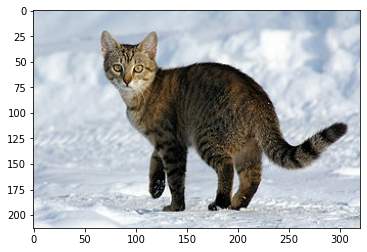

In [54]:
plt.imshow(cat_img);

In [55]:
import tensorflow_io as tfio

## Convert RGB to Grayscale
An RGB image can be converted to Grayscale to reduce the channel from 3 to 1 with `tfio.experimental.color.rgb_to_grayscale`:

Shape of gray-scale-image (213, 320, 1)


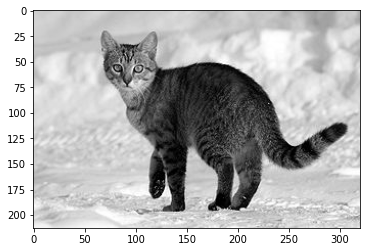

In [59]:
gray = tf.image.rgb_to_grayscale(cat_img)

print('Shape of gray-scale-image', gray.shape)
plt.imshow(tf.squeeze(gray), cmap=plt.cm.gray);

Shape of gray-scaled-image (213, 320, 1) type <dtype: 'uint8'>


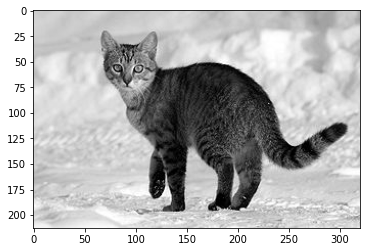

In [61]:
# using tfio

gray = tfio.experimental.color.rgb_to_grayscale(cat_img)

print('Shape of gray-scaled-image', gray.shape, 'type', gray.dtype)
plt.imshow(tf.squeeze(gray), cmap=plt.cm.gray);

## Convert RGB to BGR
Some image software and camera manufacturors might prefer BGR, which can be obtained through `tfio.experimental.color.rgb_to_bgr`:

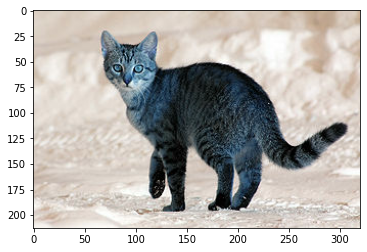

In [63]:
brg = tfio.experimental.color.rgb_to_bgr(cat_img)

plt.imshow(brg);

## Convert RGB to CIE XYZ
CIE XYZ (or CIE 1931 XYZ is a common color space used in many image processing programs. The following is the conversion from RGB to CIE XYZ through `tfio.experimental.color.rgb_to_xyz`. 

Note `tfio.experimental.color.rgb_to_xyz` assumes floating point input in the range of [0, 1] so additional pre-processing is needed:

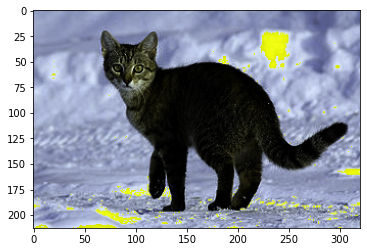

In [64]:
# convert to float32
float_32_img = tf.cast(cat_img, tf.float32)/255

ciexyz = tfio.experimental.color.rgb_to_xyz(float_32_img)

# convert back uint8
img = tf.cast(ciexyz*255 , 'uint8')

plt.imshow(img);

## Convert RGB to YCbCr
Finally, YCbCr is the default color space in many video systems. Converting to YCbCr could be done through `tfio.experimental.color.rgb_to_ycbcr`:

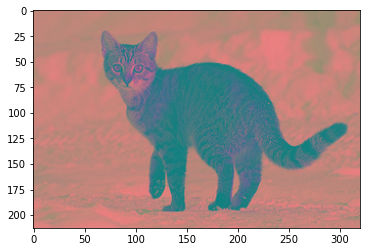

In [65]:
ycbcr = tfio.experimental.color.rgb_to_ycbcr(cat_img)

plt.imshow(ycbcr);

What is more interesting, though, is that YCbCr could be decomposed into Y' (luma), Cb (blue-difference chroma), and Cr (red-difference chroma) components with each component carry perceptually meaningful information:

In [66]:
Y = ycbcr[:,:,0]
Cb = ycbcr[:,:,1]
Cr = ycbcr[:,:,2]

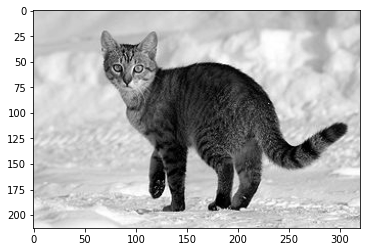

In [69]:
plt.imshow(Y, cmap='gray');

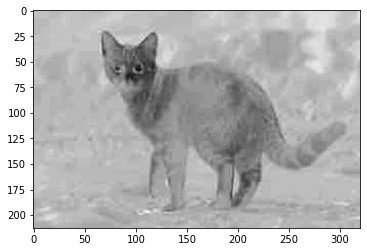

In [70]:
plt.imshow(Cb, cmap='gray');

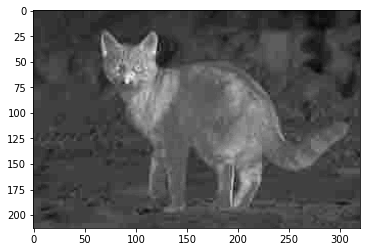

In [71]:
plt.imshow(Cr, cmap='gray');